In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
df = pd.read_csv('c:/debate.csv',encoding='latin1') #read data
%matplotlib inline

We use the data of 2016 US president debate, which contains three presidential debates between Hillary Cliton and Donald Trump as well as one vice presidental debate between Tim Kaine and Mike Pence. The debate is highly competitive and attract worldwide attention. As we known, the result of the president election is so unexpected, so we will compare the behavior differences in the debate between Hillary Cliton and Donald Trump in multiple aspects, like how many words they said, how large the vocabulary they have, how many times they laugh and applaud, and the most frequency words they used. 

In [2]:
df

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/16
1,2,Audience,(APPLAUSE),9/26/16
2,3,Clinton,"How are you, Donald?",9/26/16
3,4,Audience,(APPLAUSE),9/26/16
4,5,Holt,Good luck to you.,9/26/16
5,6,Audience,(APPLAUSE),9/26/16
6,7,Holt,"Well, I don't expect us to cover all the issue...",9/26/16
7,8,Clinton,"Well, thank you, Lester, and thanks to Hofstra...",9/26/16
8,9,Clinton,I also want to see more companies do profit-sh...,9/26/16
9,10,Holt,"Secretary Clinton, thank you. Mr. Trump, the s...",9/26/16


In [3]:
df['Text'][0]

'Good evening from Hofstra University in Hempstead, New York. I\'m Lester Holt, anchor of "NBC Nightly News." I want to welcome you to the first presidential debate. The participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight\'s format, and the rules have been agreed to by the campaigns. The 90-minute debate is divided into six segments, each 15 minutes long. We\'ll explore three topic areas tonight: Achieving prosperity; America\'s direction; and securing America. At the start of each segment, I will ask the same lead-off question to both candidates, and they will each have up to two minutes to respond. From that point until the end of the segment, we\'ll have an open discussion. The questions are mine and have not been shared with the commission or the campaigns. The audience here in the room has agreed to remain silent so that we can focus on w

In [4]:
type(df['Text'])

pandas.core.series.Series

In [5]:
type(df['Text'][0])

str

Read the data of debate content as strings.

In [6]:
text = []
#initial string list
for i in range(0,1388):
    content=df['Text'][i].lower()
    content=content.replace('<br/>',' ')
    for char in ['.', '"', ',', '(', ')', '!', '?', ';', ':','-',]:
        content =content.replace(char,'')   
    text.append(content)
n=len(text)
x=n
for i in range(0,n):
    if i==(x-1):
        break
    if (text[i]=='applause'):
        del text[i]
        x=x-1
    if (text[i]=='crosstalk'):
        del text[i]
        x=x-1
    if (text[i]=='laughter'):
        del text[i]
        x=x-1
text

["good evening from hofstra university in hempstead new york i'm lester holt anchor of nbc nightly news i want to welcome you to the first presidential debate the participants tonight are donald trump and hillary clinton this debate is sponsored by the commission on presidential debates a nonpartisan nonprofit organization the commission drafted tonight's format and the rules have been agreed to by the campaigns the 90minute debate is divided into six segments each 15 minutes long we'll explore three topic areas tonight achieving prosperity america's direction and securing america at the start of each segment i will ask the same leadoff question to both candidates and they will each have up to two minutes to respond from that point until the end of the segment we'll have an open discussion the questions are mine and have not been shared with the commission or the campaigns the audience here in the room has agreed to remain silent so that we can focus on what the candidates are saying i

We use stop word set to remove the unrelevant words in the data. We show the stop word set below.

In [7]:
stopword_set = set(stopwords.words('english'))
print(stopword_set)

{'own', 'you', 'yours', 'their', 'now', 'if', 'haven', 'into', 'didn', 'its', 'y', 'nor', 'over', 'down', 'i', 'his', 'herself', 'themselves', 'ourselves', 'what', 'this', 'being', 've', 'hasn', 'few', 'with', 'yourself', 'itself', 'were', 'and', 's', 'mustn', 'himself', 'such', 'do', 'off', 'her', 'm', 'have', 'against', 'each', 'a', 'weren', 'both', 'will', 'was', 'so', 'by', 'o', 'hers', 'for', 'which', 'too', 'than', 'more', 'yourselves', 'doing', 'ma', 'how', 't', 'be', 'about', 'any', 'of', 'under', 'where', 'further', 'ours', 'had', 'until', 'shan', 'as', 'above', 'in', 'an', 'or', 'my', 'mightn', 'them', 'does', 'can', 'has', 'these', 'from', 'needn', 'whom', 'just', 'won', 'before', 'here', 'below', 'll', 'your', 'while', 'then', 'is', 'having', 'between', 'wasn', 'all', 'couldn', 'they', 'after', 'to', 'through', 'that', 'ain', 'on', 'no', 'we', 're', 'out', 'only', 'it', 'am', 'those', 'the', 'same', 'are', 'me', 'isn', 'she', 'aren', 'wouldn', 'did', 'some', 'should', 'hadn

We tokenize the data and remove stop words from it.

In [8]:
Speaking_tokenized = [word_tokenize(line.lower()) for line in text]
Speaking_no_stops = [[word for word in line if word not in stopword_set] for line in Speaking_tokenized]
b = []
for i in range(0,len(Speaking_no_stops)-1):
    str=''
    for j in range(0,len(Speaking_no_stops[i])):
        str=str+' '+Speaking_no_stops[i][j]
    b.append(str)
b

[" good evening hofstra university hempstead new york 'm lester holt anchor nbc nightly news want welcome first presidential debate participants tonight donald trump hillary clinton debate sponsored commission presidential debates nonpartisan nonprofit organization commission drafted tonight 's format rules agreed campaigns 90minute debate divided six segments 15 minutes long 'll explore three topic areas tonight achieving prosperity america 's direction securing america start segment ask leadoff question candidates two minutes respond point end segment 'll open discussion questions mine shared commission campaigns audience room agreed remain silent focus candidates saying invite applaud however moment welcome candidates democratic nominee president united states hillary clinton republican nominee president united states donald j trump",
 ' donald',
 ' good luck',
 " well n't expect us cover issues campaign tonight remind everyone two presidential debates scheduled going focus many iss

Now we convert the data to a sparse encoded bag-of-words representation.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
bag_words = count_vect.fit_transform(b)
bag_words.shape

(1305, 4213)

In [10]:
print(bag_words)

  (0, 3201)	1
  (0, 3599)	2
  (0, 3970)	2
  (0, 2903)	2
  (0, 2588)	2
  (0, 1092)	1
  (0, 2481)	1
  (0, 1912)	1
  (0, 329)	1
  (0, 2070)	1
  (0, 3332)	1
  (0, 1588)	1
  (0, 3473)	1
  (0, 3163)	1
  (0, 3275)	1
  (0, 406)	1
  (0, 3435)	1
  (0, 2452)	1
  (0, 3033)	1
  (0, 1189)	1
  (0, 2659)	1
  (0, 1343)	1
  (0, 2835)	1
  (0, 3219)	1
  (0, 3931)	1
  :	:
  (1303, 3735)	4
  (1303, 1794)	1
  (1303, 635)	1
  (1303, 4050)	1
  (1303, 662)	3
  (1303, 3372)	1
  (1303, 4164)	1
  (1303, 4158)	1
  (1303, 3059)	1
  (1303, 2354)	4
  (1303, 817)	2
  (1303, 2545)	2
  (1303, 965)	1
  (1303, 2483)	1
  (1303, 508)	1
  (1303, 4199)	2
  (1303, 2116)	1
  (1303, 2771)	3
  (1303, 3075)	1
  (1303, 1715)	3
  (1303, 645)	1
  (1303, 3592)	1
  (1303, 281)	4
  (1303, 2293)	1
  (1304, 3792)	1


Then we use the bag of words got above to convert it to a sparse encoded tf-idf representation.

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
bag = bag_words.toarray() #transform sparse matrix to list
tf_idf = transformer.fit_transform(bag)
print(tf_idf)

  (0, 4206)	0.0706571364215
  (0, 4115)	0.16616402966
  (0, 4071)	0.0431630658751
  (0, 3972)	0.0802925103258
  (0, 3970)	0.112961111384
  (0, 3931)	0.0537950225485
  (0, 3903)	0.0836604447305
  (0, 3844)	0.0802925103258
  (0, 3839)	0.211971409264
  (0, 3819)	0.0706571364215
  (0, 3599)	0.109940893727
  (0, 3592)	0.0683349332688
  (0, 3569)	0.098353721149
  (0, 3487)	0.0887183472447
  (0, 3473)	0.098353721149
  (0, 3435)	0.103990053563
  (0, 3379)	0.098353721149
  (0, 3378)	0.141314272843
  (0, 3370)	0.0943546796592
  (0, 3332)	0.0592447628171
  (0, 3287)	0.0912527820946
  (0, 3275)	0.0865755131116
  (0, 3219)	0.0610217625171
  (0, 3201)	0.0779703071731
  (0, 3163)	0.0887183472447
  :	:
  (1303, 1692)	0.216418435425
  (1303, 1631)	0.16981233
  (1303, 1577)	0.129948060983
  (1303, 1415)	0.0697877217592
  (1303, 1292)	0.0868959852432
  (1303, 1280)	0.112482528239
  (1303, 1231)	0.0690810359495
  (1303, 1201)	0.129948060983
  (1303, 1176)	0.0781514514277
  (1303, 1102)	0.129948060983
  (1

Here we count the top 40 most commonly used words by all speakers and plot the top 20 words in to histogram.

In [25]:
pd.options.display.max_columns = 1500
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
print(df.sum().sort_values()[-40:])

back          94
take          96
time          96
really        97
tax           98
ll            99
way          100
many         102
lot          105
years        111
right        111
question     112
first        113
us           114
make         115
mr           118
hillary      121
go           121
like         124
let          136
say          144
president    148
one          157
look         159
secretary    171
get          186
donald       186
well         202
know         211
would        217
think        223
clinton      225
country      228
trump        235
want         236
ve           241
said         249
people       309
going        353
re           393
dtype: int64


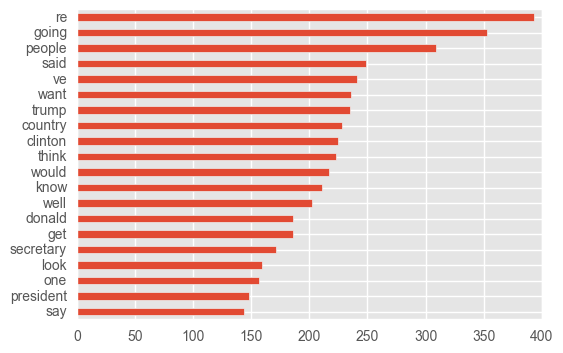

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax=df.sum().sort_values()[-20:].plot(kind='barh')

Here we count the total speak times for each speakers.

In [13]:
df = pd.read_csv('c:/debate.csv',encoding='latin1')
df.Speaker.value_counts()

Trump         355
Clinton       243
Pence         134
Wallace       131
Kaine         124
Holt           98
Quijano        76
Cooper         75
Raddatz        62
CANDIDATES     47
Audience       36
QUESTION        8
Name: Speaker, dtype: int64

We compare the total speak times for Clinton and Trump at 3 debates. It is obviously that Trump always talk much more times than Clinton at the debates. 

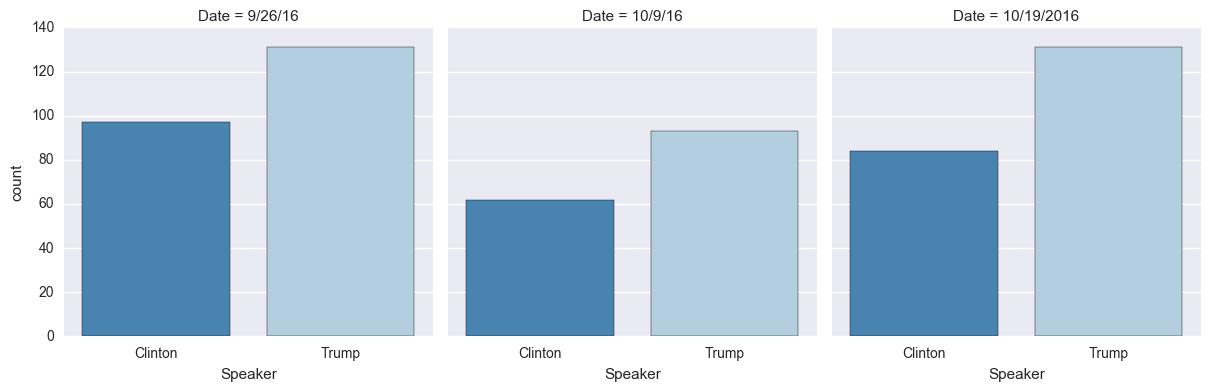

In [14]:
df = pd.read_csv('c:/debate.csv',encoding='latin1') #read data
g = sns.factorplot("Speaker", col="Date", col_wrap=3, palette='Blues_r',
                  data = df[(df['Speaker'] == 'Trump') | (df['Speaker'] == 'Clinton')], 
                   kind="count")

Here we compare the laugh times and applaud times for Clinton and Trump. We can tell that Trump behaved more active than Clinton at the dabate.

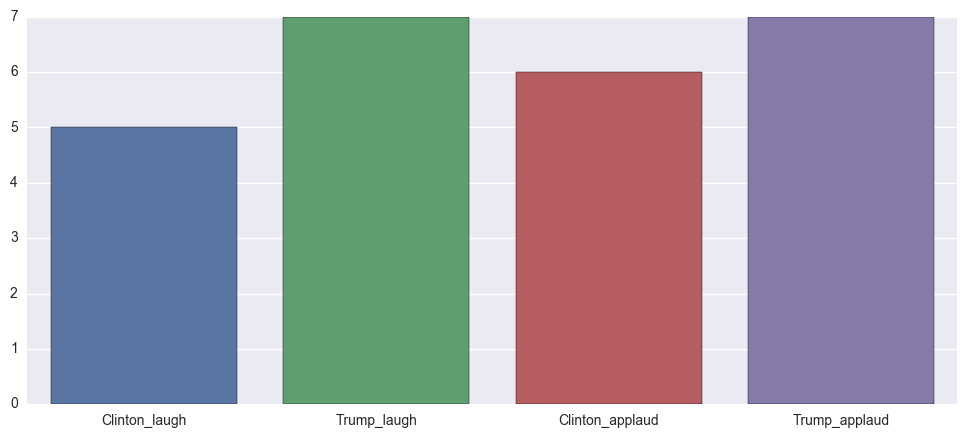

In [15]:
df = pd.read_csv('c:/debate.csv',encoding='latin1') #read data
Data=df
Clinton_laugh=[]
Trump_laugh=[]
Clinton_applaud=[]
Trump_applaud=[]
for i in range(0,len(Data)-1):
    if Data['Speaker'][i]=='Clinton' and Data['Text'][i+1]=='(APPLAUSE)':
        Clinton_applaud.append(i)
    elif Data['Speaker'][i]=='Trump' and Data['Text'][i+1]=='(APPLAUSE)':
        Trump_applaud.append(i)
    elif Data['Speaker'][i]=='Clinton' and Data['Text'][i+1]=='(LAUGHTER)':
        Clinton_laugh.append(i)
    elif Data['Speaker'][i]=='Trump' and Data['Text'][i+1]=='(LAUGHTER)':
        Trump_laugh.append(i)
fig,ax = plt.subplots(figsize=(12,5))
a=['Clinton_laugh','Trump_laugh','Clinton_applaud','Trump_applaud']
z=[len(Clinton_laugh),len(Trump_laugh),len(Clinton_applaud),len(Trump_applaud)]
sns.barplot(x=a,y=z,ax=ax)

At last, we made a wordcould which catians the most commonly used words by Donald Trump.

Trump words


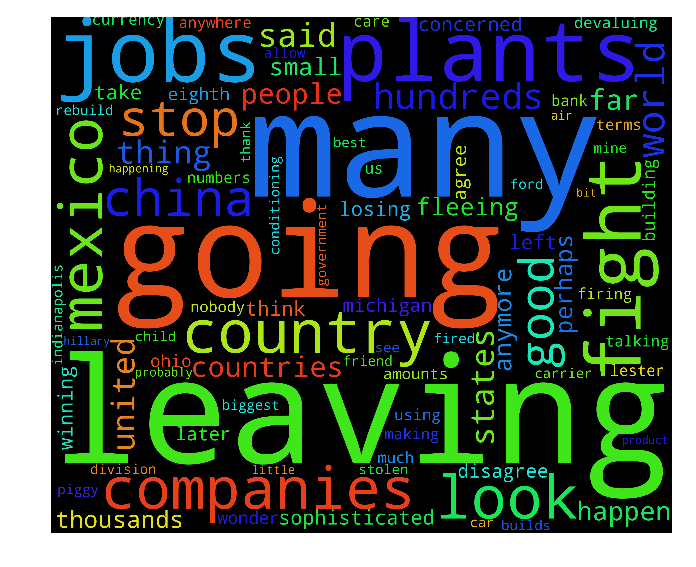

In [20]:
from wordcloud import WordCloud
def words_clean(content):
    Keep_words = re.sub("[^a-zA-Z]", " ", content) 
    words_trans = Keep_words.lower().split()                             
    stop_words = set(stopwords.words("english"))                  
    content = [w for w in words_trans if not w in stop_words] 
    return( " ".join( content )) 
df=df[df['Speaker']=='Trump']
Speaker_text=[]
for each in df['Text']:
    Speaker_text.append(words_clean(each))
color='black'
wordcloud = WordCloud(background_color=color,width=3000,
height=2500).generate(Speaker_text[0])
print('Trump'+' words')
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()